In [1]:
from src.preprocessing import *
from src.metrics import *
from src.visualisation import *
from src.NetworkGraphs import *

In [2]:
networkGraphs = NetworkGraphs('../datasets/Railway.csv', type="RAILWAY", spatial =True)

Excluded 6022 stations


In [7]:
networkGraphs.__dict__

{'filename': '../datasets/Railway.csv',
 'name': 'Railway',
 'type': 'RAILWAY',
 'temporal': False,
 'spatial': True,
 'DiGraph': <networkx.classes.digraph.DiGraph at 0x16879dd10>,
 'MultiDiGraph': <networkx.classes.multidigraph.MultiDiGraph at 0x15f6ab850>,
 'Graph': <networkx.classes.graph.Graph at 0x15f6ab7d0>,
 'MultiGraph': <networkx.classes.multigraph.MultiGraph at 0x15d0d9550>,
 'pos': {692: (112.58682, 37.86048),
  1351: (112.73118, 37.69719),
  698: (112.57032, 37.42136),
  944: (112.16847, 37.20661),
  232: (111.91906, 37.01847),
  1639: (111.77102, 36.86171),
  2335: (111.71973, 36.58583),
  1512: (111.67162, 36.26214),
  127: (111.53682, 36.08683),
  259: (111.3585, 35.61313),
  1835: (110.99518, 35.6127),
  1480: (110.72605, 35.58776),
  2362: (110.44188, 35.48393),
  503: (110.09119, 35.19518),
  1009: (109.40295, 34.77167),
  2058: (108.96283, 34.27727),
  802: (107.15321, 34.37297),
  681: (105.8986, 34.56586),
  1704: (105.33231, 34.76293),
  2314: (104.70544, 34.95238

<module 'matplotlib.pyplot' from '/opt/homebrew/lib/python3.11/site-packages/matplotlib/pyplot.py'>

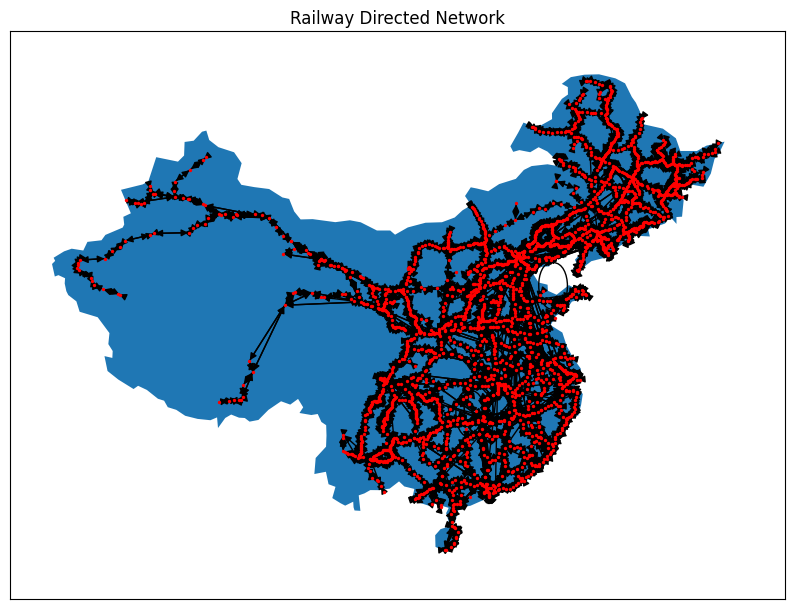

In [8]:
nx.draw(networkGraphs.DiGraph, networkGraphs.pos, node_size=1)

<module 'matplotlib.pyplot' from '/opt/homebrew/lib/python3.11/site-packages/matplotlib/pyplot.py'>

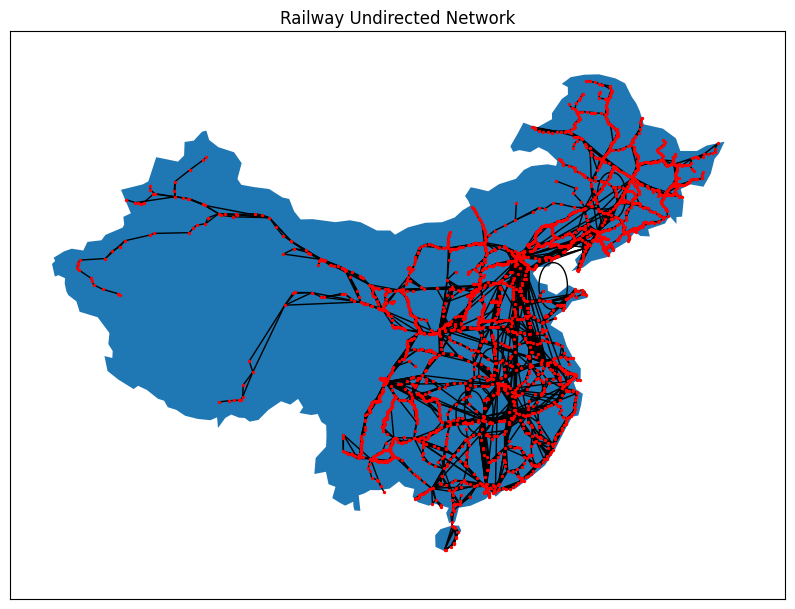

In [9]:
networkx, multi_networkx = preprocess('../datasets/Railway.csv', DatasetType.RAILWAY)

In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import ipywidgets as widgets
from IPython.display import display
%matplotlib notebook

# Graph Statistics

In [10]:
global_metrics = compute_global_metrics(networkx)
global_metrics

,Metrics,Directed,Undirected
0,Clustering Coefficient,0.377180,0.422829
1,Avg. Shortest Path Length,0.000000,8.786388
2,Diameter,0.000000,47.000000
3,Radius,0.000000,24.000000
4,Number of Nodes,2719.000000,2719.000000
5,Number of Edges,10778.000000,6175.000000
6,Density,0.001458,0.001671
7,Transitivity,0.292370,0.321659
8,Avg. Degree,7.927915,4.542111
9,Avg. Clustering,0.377180,0.422829


# VISUALISATION

# Spatial and Temporal Analysis

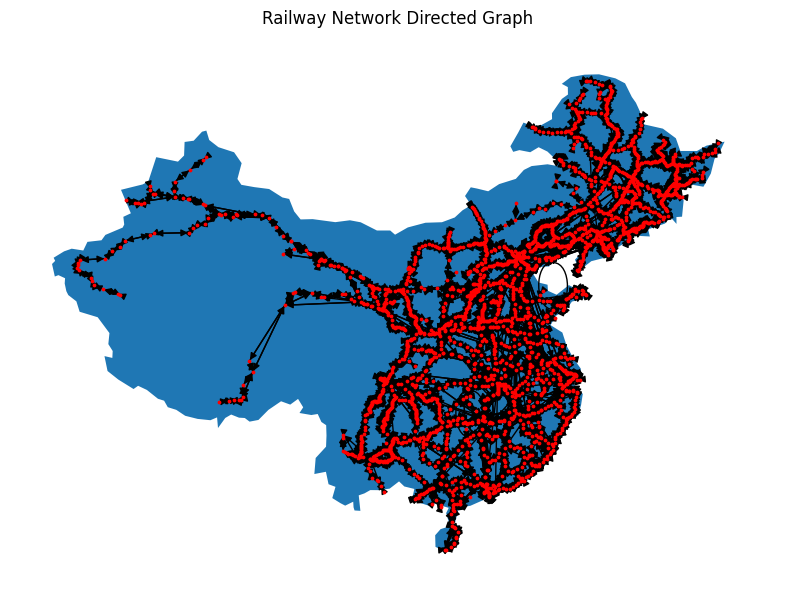

In [5]:
plt_directed = plot_static_on_map(networkx, 'Railway Network Directed Graph', directed=True)

In [ ]:
plt_undirected = plot_static_on_map(networkx, 'Railway Network Undirected Graph', directed=False)

# Spatial and Temporal Analysis

### Create frames of the graph
May take very long to create all of the frame images for 2 Days, one frame is created every 5 minute. You may change the range to create less frames and a shorter video.

In [ ]:
temporal_graphs = create_temporal_subgraph(multi_networkx)

In [3]:
slider, plt = plot_temporal_graphs(temporal_graphs)
display(slider)
plt.show()

,Node,Degree Centrality,Eigenvector Centrality,Closeness Centrality,Betweeness Centrality
0,692,0.008094,1.613618e-02,0.146138,0.025283
1,1351,0.005519,4.355226e-03,0.136173,0.015457
2,698,0.002208,6.230837e-04,0.119821,0.000544
3,944,0.003679,2.012309e-03,0.127892,0.000967
4,232,0.005151,6.061874e-04,0.120029,0.007658
...,...,...,...,...,...
2714,2768,0.001472,1.448486e-07,0.086094,0.002926
2715,2679,0.001472,1.301788e-08,0.079258,0.002195
2716,2657,0.001472,1.169981e-09,0.073423,0.001464
2717,2682,0.001472,1.051485e-10,0.068386,0.000732


### Create a video of the graph with cv2 (OpenCV)

In [9]:
# import cv2
# import os
#
# # Path to the folder containing the image frames
# frames_folder = 'frames/'
#
# # Get the list of frame filenames in the folder
# frame_filenames = os.listdir(frames_folder)
#
# # Sort the filenames in ascending order
# frame_filenames.sort(key=lambda x: int(x[:-4]))
#
# # Read the first frame to get its dimensions
# frame = cv2.imread(frames_folder + frame_filenames[0])
# height, width, layers = frame.shape
#
# # Create a VideoWriter object to write the video
# fourcc = cv2.VideoWriter_fourcc(*'mp4v')
# video = cv2.VideoWriter('output.mp4', fourcc, 30, (width, height))
#
# # Loop through the frames and add them to the video
# i=0
# for filename in frame_filenames:
#     frame = cv2.imread(frames_folder + filename)
#     video.write(frame)
#     print(f"\r{i/2764*100:.2f}%", end="")
#     i+=1
#
# # Release the VideoWriter object and display a message
# video.release()
# print('\nVideo saved as output.mp4')

# SHORTEST PATH ANALYSIS

In [4]:
# def shortest_path(G, source, target):
#     return nx.shortest_path(G, source=source, target=target)

[1136, 1763, 389, 390, 2058, 802, 1070, 2065, 1100, 2144, 1095]

In [6]:
networkx

[1136, 1763, 389, 390, 2058, 802, 1070, 2065, 1100, 2144, 1095]

In [7]:
nx.shortest_path(networkx, source=1136, target=1095)

[1136, 1763, 389, 390, 2058, 802, 1070, 2065, 1100, 2144, 1095]

In [9]:
# Network Graph with the shortest path highlighted
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

china=world[world['name'] == 'China']
china.plot(figsize=(10,10))
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=False, node_size=1, node_color='red')

shortest_path = nx.shortest_path(G, source=1095, target=1136)
nx.draw_networkx_nodes(G, pos, nodelist=shortest_path, node_size=10, node_color='yellow')
nx.draw_networkx_edges(G, pos, edgelist=list(zip(shortest_path, shortest_path[1:])), edge_color='yellow', width=3)

plt.axis('on')
plt.title("Shortest Path between 1136 and 1095")
plt.show()


<IPython.core.display.Javascript object>

NetworkXNoPath: No path between 1095 and 1136.